<h1>Итоговый проект: Flight Delay<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-DataFrame" data-toc-modified-id="Обзор-DataFrame-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор DataFrame</a></span></li><li><span><a href="#Найти-аэропорт-с-минимальной-задержкой-вылета" data-toc-modified-id="Найти-аэропорт-с-минимальной-задержкой-вылета-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Найти аэропорт с минимальной задержкой вылета</a></span></li><li><span><a href="#Самая-пунктуальная-авиакомпания-на-прилет-в-Los-Angeles-International-Airport" data-toc-modified-id="Самая-пунктуальная-авиакомпания-на-прилет-в-Los-Angeles-International-Airport-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Самая пунктуальная авиакомпания на прилет в Los Angeles International Airport</a></span></li><li><span><a href="#Аэропорт-с-самой-большой-долей-руления-на-1-самолетовылет" data-toc-modified-id="Аэропорт-с-самой-большой-долей-руления-на-1-самолетовылет-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Аэропорт с самой большой долей руления на 1 самолетовылет</a></span></li></ul></div>

# Обзор DataFrame

In [159]:
import pandas as pd
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

import warnings
warnings.filterwarnings('ignore')

<b>Данные - </b>https://www.kaggle.com/usdot/flight-delays
<p><b>Описание</b> - cводная информация о количестве своевременных, задержанных, отмененных и 
измененных рейсов в США за 2015 год (5.8 млн записей)</p>

In [3]:
flights = pd.read_csv('flights.csv')
airlines = pd.read_csv('airlines.csv')
airports = pd.read_csv('airports.csv')

In [4]:
flights.head(3)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
airlines.head(3)

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.


In [6]:
airports.head(3)

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919


In [7]:
print(flights.info(), airlines.info(), airports.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [8]:
print('flights -', flights.shape,'\n' 'airlines - ', airlines.shape,'\n' 'airports - ', airports.shape)

flights - (5819079, 31) 
airlines -  (14, 2) 
airports -  (322, 7)


In [9]:
print('***flights***', flights.nunique(),'***airlines***', airlines.nunique(),'***airports***', airports.nunique(), sep = '\n')

***flights***
YEAR                      1
MONTH                    12
DAY                      31
DAY_OF_WEEK               7
AIRLINE                  14
FLIGHT_NUMBER          6952
TAIL_NUMBER            4897
ORIGIN_AIRPORT          930
DESTINATION_AIRPORT     930
SCHEDULED_DEPARTURE    1321
DEPARTURE_TIME         1440
DEPARTURE_DELAY        1217
TAXI_OUT                184
WHEELS_OFF             1440
SCHEDULED_TIME          550
ELAPSED_TIME            712
AIR_TIME                675
DISTANCE               1363
WHEELS_ON              1440
TAXI_IN                 185
SCHEDULED_ARRIVAL      1435
ARRIVAL_TIME           1440
ARRIVAL_DELAY          1240
DIVERTED                  2
CANCELLED                 2
CANCELLATION_REASON       4
AIR_SYSTEM_DELAY        570
SECURITY_DELAY          154
AIRLINE_DELAY          1067
LATE_AIRCRAFT_DELAY     695
WEATHER_DELAY           632
dtype: int64
***airlines***
IATA_CODE    14
AIRLINE      14
dtype: int64
***airports***
IATA_CODE    322
AIRPORT      

In [10]:
print('***flights***', flights.isnull().sum(),'***airlines***', airlines.isnull().sum(),'***airports***', airports.isnull().sum(), sep = '\n')

***flights***
YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64
***airlines*

In [11]:
print('***flights***', flights.duplicated().sum(),'***airlines***', airlines.duplicated().sum(),'***airports***', airports.duplicated().sum(), sep = '\n')

***flights***
0
***airlines***
0
***airports***
0


# Найти аэропорт с минимальной задержкой вылета 


Для решения этой задачи нам понадобятся две таблицы <b>flights</b> и <b>airports</b>

In [12]:
flights.sample(5)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
2564169,2015,6,11,4,B6,283,N703JB,JFK,MCO,1547,...,1822.0,-37.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5234756,2015,11,24,2,WN,814,N419WN,SMF,BUR,635,...,741.0,-4.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5014587,2015,11,10,2,AA,1982,N172US,LAX,CLT,50,...,745.0,-45.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
440721,2015,1,29,4,WN,4277,N359SW,MKE,MSP,2025,...,2131.0,-14.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4261210,2015,9,23,3,OO,4577,N440SW,LSE,MSP,700,...,738.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
airports.head(5)

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


Проверим совпадают ли значения в столбцах для объединения или нет

In [14]:
print(flights.ORIGIN_AIRPORT.nunique())
print(airports.IATA_CODE.nunique())
print('Разница - ',flights.ORIGIN_AIRPORT.nunique()-airports.IATA_CODE.nunique())

930
322
Разница -  608


In [15]:
col1 = flights.ORIGIN_AIRPORT.to_list()
col2 = airports.IATA_CODE.to_list()
print('Разница - ', len(set.difference(set(col1), set(col2))),'\n''Значения - ', set.difference(set(col1), set(col2)))

Разница -  608 
Значения -  {'12758', '13851', 10257, '12016', '11986', 10268, '12191', 12323, '12323', 10279, '13256', 12335, 12339, '10431', 12343, 10299, '10779', '10821', '13502', '14122', 10333, 12389, 12391, '14908', 12402, '11097', 14457, '14150', '15070', 10372, '11146', '14489', 14487, 14489, 12441, 14492, 10397, '14543', 12448, 12451, '11203', 10408, '15323', '11057', '10728', '11259', '15027', 10423, 14520, '12265', '10581', '15411', '15607', 12478, 10431, 14524, 10434, '12889', '14307', 14543, '11337', 12511, 10469, 12519, 14570, 12523, '10469', 14574, 14576, '11612', '12177', 14588, '10561', '11603', '13076', 10529, 14633, 14635, '11905', '12451', 10551, '10299', '13264', '10157', 10561, '14027', '15041', '11447', '15841', '11898', 10577, 14674, '13241', 10581, 14679, 14683, 14685, '11150', '12343', 14689, 10599, 14696, 14698, '14109', '11525', 14709, 14711, 10620, '11315', 10627, 10631, 14730, '11267', '13198', 14747, '10926', '14683', 14771, '10627', 10685, 14783, '14252

В таблице <b>flights</b> название аэропорта зашифровано пятизначным кодом. Рассмотрим таблицу <b>flights</b> отфильтровав значения в столбце <b>ORIGIN_AIRPORT</b>
которые содержат пятизначный код

In [16]:
dff = flights[flights['ORIGIN_AIRPORT'].map(str).apply(len)>3]
dff.nunique()

YEAR                      1
MONTH                     1
DAY                      31
DAY_OF_WEEK               7
AIRLINE                  13
FLIGHT_NUMBER          5974
TAIL_NUMBER            4326
ORIGIN_AIRPORT          608
DESTINATION_AIRPORT     608
SCHEDULED_DEPARTURE    1150
DEPARTURE_TIME         1360
DEPARTURE_DELAY         644
TAXI_OUT                149
WHEELS_OFF             1366
SCHEDULED_TIME          433
ELAPSED_TIME            615
AIR_TIME                590
DISTANCE               1209
WHEELS_ON              1438
TAXI_IN                 108
SCHEDULED_ARRIVAL      1329
ARRIVAL_TIME           1435
ARRIVAL_DELAY           669
DIVERTED                  2
CANCELLED                 2
CANCELLATION_REASON       3
AIR_SYSTEM_DELAY        313
SECURITY_DELAY           51
AIRLINE_DELAY           534
LATE_AIRCRAFT_DELAY     394
WEATHER_DELAY           243
dtype: int64

In [17]:
dff.head(3)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
4385712,2015,10,1,4,AA,1230,N3DBAA,14747,11298,5,...,543.0,-19.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4385713,2015,10,1,4,DL,1805,N696DL,14771,13487,5,...,528.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4385714,2015,10,1,4,NK,612,N602NK,12889,13487,5,...,448.0,-14.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


Замечаем, что название аэропорта указано пятизначным кодом только в октябре (MONTH - 10)
Для этого воспользуемся двумя датафреймами
<b>Airport</b> и <b>AirportID</b> в которых найдем расшифровки для аэропортов и сделаем замену пятизначного кода на буквенный в таблице <b>flights</b> 

In [18]:
Airport = pd.read_csv("L_AIRPORT.csv")
AirportID = pd.read_csv("L_AIRPORT_ID.csv")

In [19]:
Airport.head(3)

,Code,Description
0,01A,"Afognak Lake, AK: Afognak Lake Airport"
1,03A,"Granite Mountain, AK: Bear Creek Mining Strip"
2,04A,"Lik, AK: Lik Mining Camp"


In [20]:
AirportID.head(3)

,Code,Description
0,10001,"Afognak Lake, AK: Afognak Lake Airport"
1,10003,"Granite Mountain, AK: Bear Creek Mining Strip"
2,10004,"Lik, AK: Lik Mining Camp"


In [21]:
df_airport = AirportID.merge(Airport, on = 'Description')
df_airport = df_airport.rename(columns={'Code_y': 'IATA_CODE'})
df_airport = airports.merge(df_airport, how = 'left', on = 'IATA_CODE')
df_airport

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE,Code_x,Description
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040,10135,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ..."
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190,10136,"Abilene, TX: Abilene Regional"
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919,10140,"Albuquerque, NM: Albuquerque International Sun..."
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183,10141,"Aberdeen, SD: Aberdeen Regional"
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447,10146,"Albany, GA: Southwest Georgia Regional"
...,...,...,...,...,...,...,...,...,...
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764,15897,"West Yellowstone, MT: Yellowstone"
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681,15919,"Fayetteville, AR: Northwest Arkansas Regional"
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023,15991,"Yakutat, AK: Yakutat Airport"
321,YUM,Yuma International Airport,Yuma,AZ,USA,32.65658,-114.60597,13785,"Yuma, AZ: Yuma MCAS/Yuma International"


In [22]:
aircode_dict = dict(zip(df_airport['Code_x'].astype(str),df_airport['IATA_CODE']))
aircode_dict

{'10135': 'ABE',
 '10136': 'ABI',
 '10140': 'ABQ',
 '10141': 'ABR',
 '10146': 'ABY',
 '10154': 'ACK',
 '10155': 'ACT',
 '10157': 'ACV',
 '10158': 'ACY',
 '10165': 'ADK',
 '10170': 'ADQ',
 '10185': 'AEX',
 '10208': 'AGS',
 '10245': 'AKN',
 '10257': 'ALB',
 '10268': 'ALO',
 '10279': 'AMA',
 '10299': 'ANC',
 '10333': 'APN',
 '10372': 'ASE',
 '10397': 'ATL',
 '10408': 'ATW',
 '10423': 'AUS',
 '10431': 'AVL',
 '10434': 'AVP',
 '10469': 'AZO',
 '10529': 'BDL',
 '10551': 'BET',
 '10561': 'BFL',
 '10577': 'BGM',
 '10581': 'BGR',
 '10599': 'BHM',
 '10620': 'BIL',
 '10627': 'BIS',
 '10631': 'BJI',
 '10666': 'BLI',
 '10685': 'BMI',
 '10693': 'BNA',
 '10713': 'BOI',
 '10721': 'BOS',
 '10728': 'BPT',
 '10731': 'BQK',
 '10732': 'BQN',
 '10739': 'BRD',
 '10747': 'BRO',
 '10754': 'BRW',
 '10779': 'BTM',
 '10781': 'BTR',
 '10785': 'BTV',
 '10792': 'BUF',
 '10800': 'BUR',
 '10821': 'BWI',
 '10849': 'BZN',
 '10868': 'CAE',
 '10874': 'CAK',
 '10918': 'CDC',
 '10926': 'CDV',
 '10930': 'CEC',
 '10980': 'CHA

In [23]:
flights_1 = flights.copy()
flights_1['ORIGIN_AIRPORT'] = flights_1['ORIGIN_AIRPORT'].values.astype(str)
flights_1['DESTINATION_AIRPORT'] = flights_1['DESTINATION_AIRPORT'].values.astype(str)

N_flights = len(flights_1)
for i in tqdm(range(N_flights)):
    if len(flights_1['ORIGIN_AIRPORT'][i]) != 3:
        to_replace = flights_1['ORIGIN_AIRPORT'][i]
        value = aircode_dict[flights_1['ORIGIN_AIRPORT'][i]]
        flights_1 = flights_1.replace(to_replace, value)
    elif len(flights_1['DESTINATION_AIRPORT'][i]) != 3:
        to_replace = flights_1['DESTINATION_AIRPORT'][i]
        value = aircode_dict[flights_1['DESTINATION_AIRPORT'][i]]
        flights_1 = flights_1.replace(to_replace, value)

Проверим результат 

In [24]:
col1 = flights_1.ORIGIN_AIRPORT.to_list()
col2 = airports.IATA_CODE.to_list()
col3 = flights_1.DESTINATION_AIRPORT.to_list()

print('Разница - ', len(set.difference(set(col1), set(col2)))," , ",len(set.difference(set(col3), set(col2))),'\n')

print(flights_1.DESTINATION_AIRPORT.nunique())
print(flights_1.ORIGIN_AIRPORT.nunique())

Разница -  0  ,  0 

322
322


Найдем аэропорт с минимальной задержкой вылета (DEPARTURE_DELAY)

In [25]:
df1 = flights_1.groupby('ORIGIN_AIRPORT').agg({'DEPARTURE_DELAY':'mean'}).sort_values('DEPARTURE_DELAY')
df1.head(1)

,DEPARTURE_DELAY
ORIGIN_AIRPORT,
YAK,-6.070932


In [26]:
airports[airports['IATA_CODE']=='YAK']

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


Визуализируем данные по дням недели для аэропорта "Yakutat Airport" 

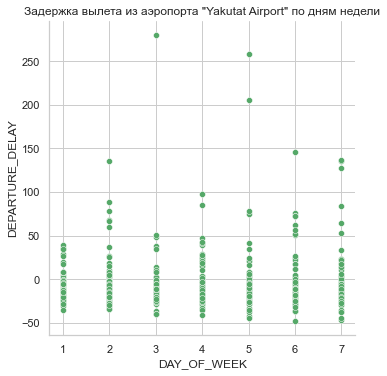

In [87]:
sns.set(style = "whitegrid")
sns.relplot(x='DAY_OF_WEEK', y='DEPARTURE_DELAY', data=flights_1[flights_1['ORIGIN_AIRPORT']=='YAK'], kind='scatter',color='g')
plt.title('Задержка вылета из аэропорта "Yakutat Airport" по дням недели', size=12);

# Самая пунктуальная авиакомпания на прилет в Los Angeles International Airport

Для решения этой задачи нам понадобятся две таблицы <b>flights</b> и <b>airlines</b>
<p>Сверим столбцы для объединения</p>

In [28]:
col1 = flights_1.AIRLINE.to_list()
col2 = airlines.IATA_CODE.to_list()
print('Разница - ', len(set.difference(set(col1), set(col2))),'\n''Значения - ', set.difference(set(col1), set(col2)))

print(flights_1.AIRLINE.nunique())
print(airlines.IATA_CODE.nunique())

Разница -  0 
Значения -  set()
14
14


Данные в двух столбцах совпадают, переименуем столбы в таблице <b>airlines</b> для объединения

In [29]:
airlines = airlines.rename(columns={'AIRLINE': 'FULL_NAME_AIRLINE','IATA_CODE': 'AIRLINE'})
airlines

,AIRLINE,FULL_NAME_AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [95]:
df2= flights_1.merge(airlines, on = 'AIRLINE')
df2

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,FULL_NAME_AIRLINE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.
1,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.
2,2015,1,1,4,AS,108,N309AS,ANC,SEA,45,...,-14.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.
3,2015,1,1,4,AS,122,N413AS,ANC,PDX,50,...,-18.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.
4,2015,1,1,4,AS,130,N457AS,FAI,SEA,115,...,-3.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,VX,769,N622VA,LGA,DAL,1855,...,-6.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Virgin America
5819075,2015,12,31,4,VX,357,N284VA,BOS,SFO,1859,...,-46.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Virgin America
5819076,2015,12,31,4,VX,1916,N853VA,SFO,LAS,1940,...,-18.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Virgin America
5819077,2015,12,31,4,VX,490,N840VA,LAX,LAS,1950,...,-11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Virgin America


Найдем самую пунктуальную авиакомпанию на прилет в LA

In [31]:
airports[airports['AIRPORT'] == 'Los Angeles International Airport']

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
176,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807


In [96]:
df2 = df2[df2['DESTINATION_AIRPORT'] == 'LAX']

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,FULL_NAME_AIRLINE
23,2015,1,1,4,AS,454,N442AS,SEA,LAX,610,...,-4.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.
34,2015,1,1,4,AS,558,N307AS,PDX,LAX,640,...,-5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.
51,2015,1,1,4,AS,466,N309AS,SEA,LAX,700,...,-6.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.
56,2015,1,1,4,AS,722,N403AS,SLC,LAX,700,...,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.
76,2015,1,1,4,AS,482,N433AS,SEA,LAX,750,...,-11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819057,2015,12,31,4,VX,315,N835VA,MCO,LAX,1730,...,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Virgin America
5819060,2015,12,31,4,VX,367,N836VA,BOS,LAX,1745,...,-7.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Virgin America
5819062,2015,12,31,4,VX,936,N840VA,SFO,LAX,1745,...,-4.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Virgin America
5819069,2015,12,31,4,VX,938,N527VA,SFO,LAX,1830,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Virgin America


In [123]:
df2.groupby('FULL_NAME_AIRLINE', as_index = False).agg({'ARRIVAL_DELAY':'mean'}).sort_values('ARRIVAL_DELAY').head(1)

,FULL_NAME_AIRLINE,ARRIVAL_DELAY
5,Hawaiian Airlines Inc.,-4.653317


Посмотрим на количество опозданий и своевременных прилетов в разрезе авиакомпаний

In [190]:
df2['result'] = np.where(df2['ARRIVAL_DELAY'] > 0, 'YES', 'NO')

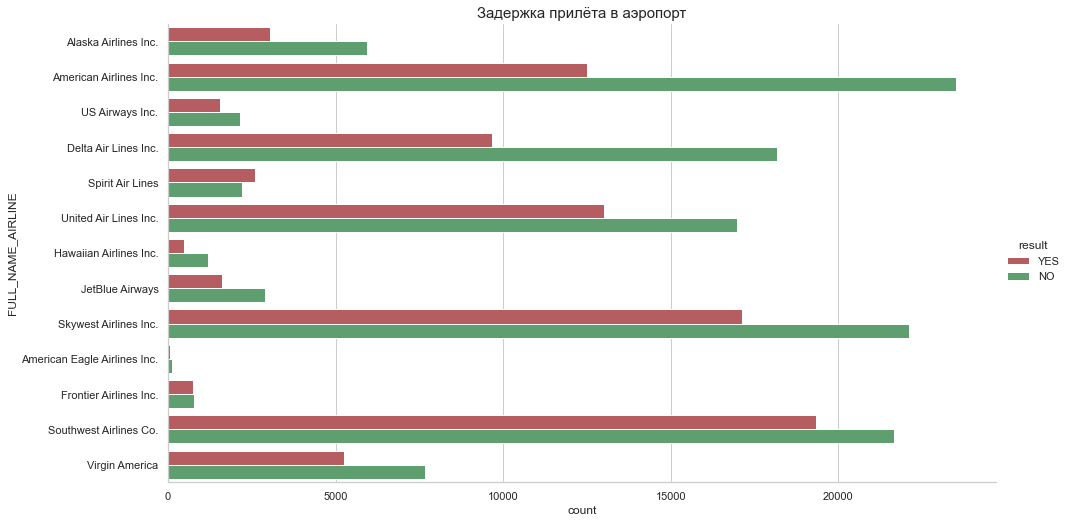

In [192]:
sns.catplot(
    y=df2['FULL_NAME_AIRLINE'], 
    data=df2, 
    kind='count', 
    hue='result', 
    hue_order=['YES','NO'], 
    palette={"YES": "r", "NO": "g"}, 
    height=7, 
    aspect=2); 
plt.title('Задержка прилёта в аэропорт', size=15);

На графике видно, что количество опозданий компании <b>Hawaiian Airlines Inc.</b> намного меньше своевременных прилетов в аэропорт.

# Аэропорт с самой большой долей руления на 1 самолетовылет

In [149]:
flights_1.sample(5).T

,385060,1911799,4954287,2289359,2005997
YEAR,2015,2015,2015,2015,2015
MONTH,1,5,11,5,5
DAY,26,2,6,26,8
DAY_OF_WEEK,1,6,5,2,5
AIRLINE,US,OO,EV,B6,DL
FLIGHT_NUMBER,734,7432,4388,1836,1913
TAIL_NUMBER,NaN,N487CA,N12540,N334JB,N977AT
ORIGIN_AIRPORT,LAS,TWF,EWR,DTW,ATL
DESTINATION_AIRPORT,PHL,SLC,JAX,BOS,LIT
SCHEDULED_DEPARTURE,1110,1223,630,618,912


Найдем самый загруженный аэропорт
<p>На вылет из аэропорта</p>

In [210]:
(flights_1.groupby(['ORIGIN_AIRPORT']).agg({'AIR_TIME':'sum'})/len(flights_1))\
.sort_values('AIR_TIME',ascending=False).head(3)

,AIR_TIME
ORIGIN_AIRPORT,
ATL,5.923949
LAX,5.612301
ORD,5.310736


<p>На прилет в аэропорт</p>

In [213]:
(flights_1.groupby(['DESTINATION_AIRPORT']).agg({'AIR_TIME':'sum'})/len(flights_1))\
.sort_values('AIR_TIME',ascending=False).head(3)

,AIR_TIME
DESTINATION_AIRPORT,
LAX,6.083109
ATL,5.806868
ORD,5.397412


In [220]:
print('ATL :', 5.806868+5.923949)
print('LAX :', 5.612301+6.083109)

ATL : 11.730817
LAX : 11.69541


In [214]:
airports[airports['IATA_CODE'] == 'ATL']

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
20,ATL,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,USA,33.64044,-84.42694
